In [1]:
#importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
# read the dataset.
data = pd.read_csv("loan_dataset.csv")

In [3]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
# shape of dataset ie,rows and columns.
data.shape

(116058, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

In [6]:
# check for null values
data.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [7]:
data.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [8]:
data.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [9]:
## check number unique values in various columns.

In [10]:
data['loan_id'].nunique()

116058

In [11]:
data['origination_date'].nunique()

3

In [12]:
data['first_payment_date'].nunique()

4

In [13]:
data['source'].nunique()

3

In [14]:
data['financial_institution'].nunique()

19

In [15]:
data['loan_purpose'].unique()

array(['C86', 'B12', 'A23'], dtype=object)

In [16]:
data['origination_date'].unique()

array(['2012-03-01', '2012-01-01', '2012-02-01'], dtype=object)

In [17]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [18]:
data1 = data.drop(['loan_id','number_of_borrowers','origination_date','first_payment_date'], axis=1)

In [19]:
data1.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [20]:
# label encoding

In [21]:
le = LabelEncoder()
data1['source'] = le.fit_transform(data1['source'])
data1['financial_institution'] = le.fit_transform(data1['financial_institution'])
data1['loan_purpose'] = le.fit_transform(data1['loan_purpose'])

In [22]:
# split the data into feature and target
X = data1.drop('m13',axis=1)
y = data1['m13']

In [23]:
# split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_reg = LogisticRegression()
log_reg_model = log_reg.fit(X_train, y_train)
log_pred = log_reg_model.predict(X_test)

In [26]:
print("Confusion Matrix is :  \n", confusion_matrix(y_test,log_pred))
print("\n")
print("Accuracy score is : ",accuracy_score(y_test,log_pred))

Confusion Matrix is :  
 [[23072    12]
 [  128     0]]


Accuracy score is :  0.9939686369119421


In [27]:
precision_score( y_test,log_pred)


0.0

In [28]:
recall_score( y_test,log_pred)

0.0

### SVM

In [29]:
from sklearn.svm import SVC

In [30]:
svm_clf = SVC(kernel ='rbf')
svm_clf_model = svm_clf.fit(X_train, y_train) 
svm_pred = svm_clf_model.predict(X_test)

In [31]:
print("Confusion Matrix is :  \n", confusion_matrix(y_test,svm_pred))
print("\n")
print("Accuracy score is : ",accuracy_score(y_test,svm_pred))

Confusion Matrix is :  
 [[23084     0]
 [  128     0]]


Accuracy score is :  0.9944856108909185


### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

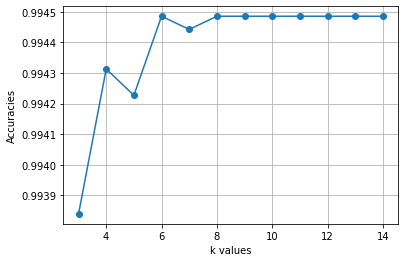

In [34]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [35]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [36]:
print("Confusion Matrix is :  \n", confusion_matrix(y_test,y_pred_kNN))
print("\n")
print("Accuracy score is : ",accuracy_score(y_test,y_pred_kNN))

Confusion Matrix is :  
 [[23084     0]
 [  128     0]]


Accuracy score is :  0.9944856108909185


### DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [39]:
print("Confusion Matrix is :  \n", confusion_matrix(y_test,y_pred_dt))
print("\n")
print("Accuracy score is : ",accuracy_score(y_test,y_pred_dt))

Confusion Matrix is :  
 [[22980   104]
 [   85    43]]


Accuracy score is :  0.9918576598311218


### RANDOM FOREST

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)

In [42]:
print("Confusion Matrix is :  \n", confusion_matrix(y_test,y_pred_rf))
print("\n")
print("Accuracy score is : ",accuracy_score(y_test,y_pred_rf))

Confusion Matrix is :  
 [[23073    11]
 [   85    43]]


Accuracy score is :  0.9958642081681889


##### Random Forest Classification model gives the best accuracy score ie, 99.59%.

### STANDARD SCALING

In [43]:
# split the data into feature and target
X = data1.drop('m13',axis=1)
y = data1['m13']

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Standard Scaling
sc = StandardScaler()

In [46]:
X=sc.fit_transform(X)

In [47]:
# spliting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LOGISTIC REGRESSION

In [48]:
log_reg = LogisticRegression()
log_reg_model = log_reg.fit(X_train, y_train)
log_pred = log_reg_model.predict(X_test)

In [49]:
print("Confusion Matrix is :  \n", confusion_matrix(y_test,log_pred))
print("\n")
print("Accuracy score is : ",accuracy_score(y_test,log_pred))

Confusion Matrix is :  
 [[23081     3]
 [   87    41]]


Accuracy score is :  0.996122695157677


### KNN

In [50]:
# find the optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

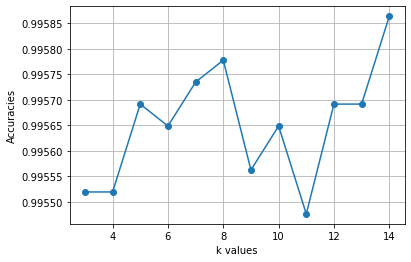

In [51]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid();

In [52]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [53]:
print("Confusion Matrix is :  \n", confusion_matrix(y_test,y_pred_kNN))
print("\n")
print("Accuracy score is : ",accuracy_score(y_test,y_pred_kNN))

Confusion Matrix is :  
 [[23075     9]
 [   92    36]]


Accuracy score is :  0.9956488023436154


### SVM

In [54]:
svm_clf = SVC(kernel ='rbf')
svm_clf_model = svm_clf.fit(X_train, y_train) 
svm_pred = svm_clf_model.predict(X_test)

In [55]:
print("Confusion Matrix is :  \n", confusion_matrix(y_test,svm_pred))
print("\n")
print("Accuracy score is : ",accuracy_score(y_test,svm_pred))

Confusion Matrix is :  
 [[23080     4]
 [  114    14]]


Accuracy score is :  0.9949164225400655


### After scaling the classification models , Logistic regression gives better accuracy score(99.61%) compared to all other models.

### Therefore, Logistic regresssion is the best model.